In [1]:
pip install japanize-matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
# CSV読込
df=pd.read_csv("C:/Users/dareka/Desktop/ds_work/quetionnary_lst_230421.csv",header=1)
df.head()

,SEQ,ID,Q1,Q2,Q3,Q4,Q4_other,Q5,Q6,Q7,...,Q10,start_month,class,Unnamed: 19,age,sex,time_c,kikkake,_other,(y/m)
0,1,A1,3.0,3,3,3,0,1,3,3,...,有休の取りやすさ、残業少なめ、リモートできる職種,2,JAVA_2月,開発,50代,女,50,ハローワーク,0,2023/4
1,2,A2,3.0,3,3,3,0,1,3,3,...,自身が未経験での転職の為、プログラミングのあらゆることを伸ばしつつ、活躍できる場,2,JAVA_2月,開発,30代,男,30,ハローワーク,0,2023/3
2,3,A3,4.0,3,3,5,0,1,3,4,...,休日、祝日はしっかり休める、ワークライフバランス大事、安定的な給料がもらえる,2,JAVA_2月,開発,20代,女,62,ハローワーク,0,2022/12
3,4,A4,3.0,3,3,3,0,1,3,3,...,休日数、勤務地、業務内容,2,JAVA_2月,開発,20代,男,70,知人,0,2023/3
4,5,A5,3.0,3,3,5,0,3,4,4,...,知らないことを知ること,2,JAVA_2月,開発,40代,男,15,ハローワーク,0,2023/3


In [5]:
# 就職への役立ち「不明」を置き換え
df.replace("不明",np.NAN,inplace=True)
df.replace("3,6",int(3),inplace=True)

In [6]:
df.loc[(df["class"]=='三宮webクリエーター12月'),:].head()

,SEQ,ID,Q1,Q2,Q3,Q4,Q4_other,Q5,Q6,Q7,...,Q10,start_month,class,Unnamed: 19,age,sex,time_c,kikkake,_other,(y/m)
118,119,J1,4.0,4,3,3,0,1,4,3,...,残業が少ない。,12,三宮webクリエーター12月,Web,20代,女,40,Web,NaN,2023/4
119,120,J2,4.0,2,3,2,0,1,3,3,...,自身の能力を発揮できる場/良好な人間関係/働き易い環境（プライベート、オンオフ）,12,三宮webクリエーター12月,Web,20代,女,45,知人,NaN,2023/1
120,121,J3,4.0,3,3,3,0,1,4,4,...,常に新しいことに挑戦できる、成長できる環境,12,三宮webクリエーター12月,Web,20代,女,60,ハローワーク,知人,2023/3
121,122,J4,4.0,3,3,4,0,1,3,3,...,ワークライフバランス,12,三宮webクリエーター12月,Web,30代,女,60,ハローワーク,NaN,2023/1
122,123,J5,4.0,4,3,3,0,3,3,3,...,やりがいのある仕事内容/労働条件/通勤距離,12,三宮webクリエーター12月,Web,20代,女,30,ハローワーク,NaN,2023/3


In [7]:
# 箱つくり
a=[2,3,4,5,7,8,-8]
df1 = df.iloc[:,a]

In [8]:
df2 = df1.dropna(how="any",axis=0)

In [9]:
df2["Q1"]=[int(x) for x in df2["Q1"]]
df2["Q4"]=[int(x) for x in df2["Q4"]]

C:\Users\dareka\AppData\Local\Temp\ipykernel_11160\2174115891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Q1"]=[int(x) for x in df2["Q1"]]
C:\Users\dareka\AppData\Local\Temp\ipykernel_11160\2174115891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Q4"]=[int(x) for x in df2["Q4"]]


In [10]:
# df2.loc[(df2["class"]=='三宮webクリエーター12月'),:]

In [11]:
df2.isnull().sum()

Q1       0
Q2       0
Q3       0
Q4       0
Q5       0
Q6       0
class    0
dtype: int64

In [12]:
df2.head()

,Q1,Q2,Q3,Q4,Q5,Q6,class
0,3,3,3,3,1,3,JAVA_2月
1,3,3,3,3,1,3,JAVA_2月
2,4,3,3,5,1,3,JAVA_2月
3,3,3,3,3,1,3,JAVA_2月
4,3,3,3,5,3,4,JAVA_2月


In [13]:
#クラスのオブジェクトが何個あるか　len() で確認
df2["class"].unique()

array(['JAVA_2月', 'WD開発基礎', 'Webアプリ', 'JAVA_1月', 'webデザイナー実践', 'クラウド',
       'グラフィック', '未経験からめざせるWeb制作+動画', '三宮web動画HP', '三宮webクリエーター12月',
       '三宮webクリエーター1月', '三宮グラフィック・Webデザイナー1月', '三宮webデザイン・プログラミング',
       '三宮web更新', '三宮webクリエーター3月', '三宮Web動画HP',
       '三宮実践Java+Pythonプログラマー養成4月'], dtype=object)

In [14]:
clas =['JAVA_2月', 'WD開発基礎', 'Webアプリ', 'JAVA_1月', 'webデザイナー実践', 'クラウド',
       'グラフィック', '未経験からめざせるWeb制作+動画', '三宮web動画HP', '三宮webクリエーター12月',
       '三宮webクリエーター1月', '三宮グラフィック・Webデザイナー1月', '三宮webデザイン・プログラミング',
       '三宮web更新', '三宮webクリエーター3月', '三宮Web動画HP',
       '三宮実践Java+Pythonプログラマー養成4月']

#17クラスある
# len(clas)

In [15]:
# len(b[0])

In [16]:
labels = ['JAVA_2月', 'WD開発基礎', 'Webアプリ', 'JAVA_1月', 'webデザイナー', 'クラウド',
        'グラフィック', 'Web制作+動画', '三)web動画HP',
        '三)webクリ12月', '三)webクリ1月',
        '三)グラ/Webデザ', '三)webデザ',
        '三)web更新', '三)webクリ', '三)Web動画HP','三)Java+Python']

In [17]:
#分散を求める関数を定義
def var(x):
  a=round(np.var(data[x]),5)
  return a

In [18]:
# np.var(data[a1[0]])

In [19]:
#リストの要素にリストを作った
b = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
#for分でそれぞれのクラスのごとに質問の分散を計算してリストに格納
a1=["Q1","Q2","Q3","Q4","Q5","Q6"]
for i in range(0,17):
  data=df2.loc[df2["class"]==clas[i],:]
  for u in range(0,6):
    b[i].append(round(np.var(data[a1[u]]),5))



In [20]:
# data=df2.loc[df2["class"]=="JAVA_2月"]
# np.var(data["Q1"])

In [21]:
#さっき格納したクラスごとの質問の分散の合計をリストの中のリストに格納した
b

[[0.1875, 0.1875, 0.35938, 1.23438, 0.73438, 0.1875],
 [0.24, 0.2816, 0.72, 1.36, 0.88, 0.2464],
 [0.24306, 0.57639, 0.24306, 1.35417, 0.41667, 0.1875],
 [0.48438, 0.35938, 0.23438, 1.9375, 0.4375, 0.60938],
 [0.1875, 0.33984, 0.23438, 1.6875, 0.73438, 0.27734],
 [0.61728, 0.39506, 0.61728, 2.83951, 0.76543, 0.09877],
 [0.2314, 0.42975, 0.44628, 1.71901, 0.77686, 0.19835],
 [0.22222, 0.38222, 0.46222, 1.04889, 0.59556, 0.19556],
 [0.0, 0.21302, 0.28402, 1.71598, 1.30178, 0.24852],
 [0.0475, 0.54, 0.26, 1.06, 0.9275, 0.21],
 [0.0, 0.63905, 0.3787, 2.39053, 0.86391, 0.24852],
 [0.0, 0.74556, 0.15385, 3.46746, 1.10059, 0.24852],
 [0.25, 0.40816, 0.2449, 2.4898, 0.67857, 0.25],
 [0.35457, 0.36565, 0.65928, 2.99723, 0.99723, 0.21607],
 [0.09877, 0.31173, 0.45988, 2.80247, 0.6821, 0.20062],
 [0.33107, 0.60317, 0.4263, 1.10658, 0.69388, 0.22222],
 [0.6281, 0.54545, 0.54545, 2.79339, 0.69421, 0.19835]]

In [22]:
#b_sumにそれぞれの質問の分散の合計を入れていく
b_sum=[]
for i in range(0,17):
  b_sum.append(round(sum(b[i]),3))


In [23]:
# print(len(b_sum),b_sum)

In [24]:
for i in range(0,17):
  print(str(b_sum[i])+" ： "+str(clas[i]))
  #print(str(clas[i])+"の分散の合計は"+str(b_sum[i]))

2.891 ： JAVA_2月
3.728 ： WD開発基礎
3.021 ： Webアプリ
4.063 ： JAVA_1月
3.461 ： webデザイナー実践
5.333 ： クラウド
3.802 ： グラフィック
2.907 ： 未経験からめざせるWeb制作+動画
3.763 ： 三宮web動画HP
3.045 ： 三宮webクリエーター12月
4.521 ： 三宮webクリエーター1月
5.716 ： 三宮グラフィック・Webデザイナー1月
4.321 ： 三宮webデザイン・プログラミング
5.59 ： 三宮web更新
4.556 ： 三宮webクリエーター3月
3.383 ： 三宮Web動画HP
5.405 ： 三宮実践Java+Pythonプログラマー養成4月


In [25]:
b_cros = pd.DataFrame(index=a1, columns=clas)
for i in range(0,17):
  b_cros[clas[i]]=b[i]


In [26]:
# ★
b_cros.columns = labels
b_cros.T
# 
# f = plt.figure(figsize=(6, 3))
# d = f.gca()
# d.axis("off")
# d.table(cellText=b_cros.values, colLabels=df.columns,
#         loc="center", bbox=[0, 0, 1, 1])
# plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/Colab Notebooks/_plot/b_cros.png", bbox_inches="tight")

,Q1,Q2,Q3,Q4,Q5,Q6
JAVA_2月,0.18750,0.18750,0.35938,1.23438,0.73438,0.18750
WD開発基礎,0.24000,0.28160,0.72000,1.36000,0.88000,0.24640
Webアプリ,0.24306,0.57639,0.24306,1.35417,0.41667,0.18750
JAVA_1月,0.48438,0.35938,0.23438,1.93750,0.43750,0.60938
webデザイナー,0.18750,0.33984,0.23438,1.68750,0.73438,0.27734
クラウド,0.61728,0.39506,0.61728,2.83951,0.76543,0.09877
グラフィック,0.23140,0.42975,0.44628,1.71901,0.77686,0.19835
Web制作+動画,0.22222,0.38222,0.46222,1.04889,0.59556,0.19556
三)web動画HP,0.00000,0.21302,0.28402,1.71598,1.30178,0.24852
三)webクリ12月,0.04750,0.54000,0.26000,1.06000,0.92750,0.21000


In [27]:
bunsan = pd.DataFrame(b_sum)
bunsan=bunsan.T
bunsan.columns = labels
bunsan
#columns=clas
bunsan_t = bunsan.T

In [28]:
# ★ 降順
bunsan_t.sort_values(0,ascending=True)
# bunsan_t.sort_values(0,ascending=False)
#　plt.savefig('/content/drive/MyDrive/Colab Notebooks/bunsan_total.png')

,0
JAVA_2月,2.891
Web制作+動画,2.907
Webアプリ,3.021
三)webクリ12月,3.045
三)Web動画HP,3.383
webデザイナー,3.461
WD開発基礎,3.728
三)web動画HP,3.763
グラフィック,3.802
JAVA_1月,4.063


In [79]:
# ★
bunsan

,JAVA_2月,WD開発基礎,Webアプリ,JAVA_1月,webデザイナー,クラウド,グラフィック,Web制作+動画,三)web動画HP,三)webクリ12月,三)webクリ1月,三)グラ/Webデザ,三)webデザ,三)web更新,三)webクリ,三)Web動画HP,三)Java+Python
0,2.891,3.728,3.021,4.063,3.461,5.333,3.802,2.907,3.763,3.045,4.521,5.716,4.321,5.59,4.556,3.383,5.405


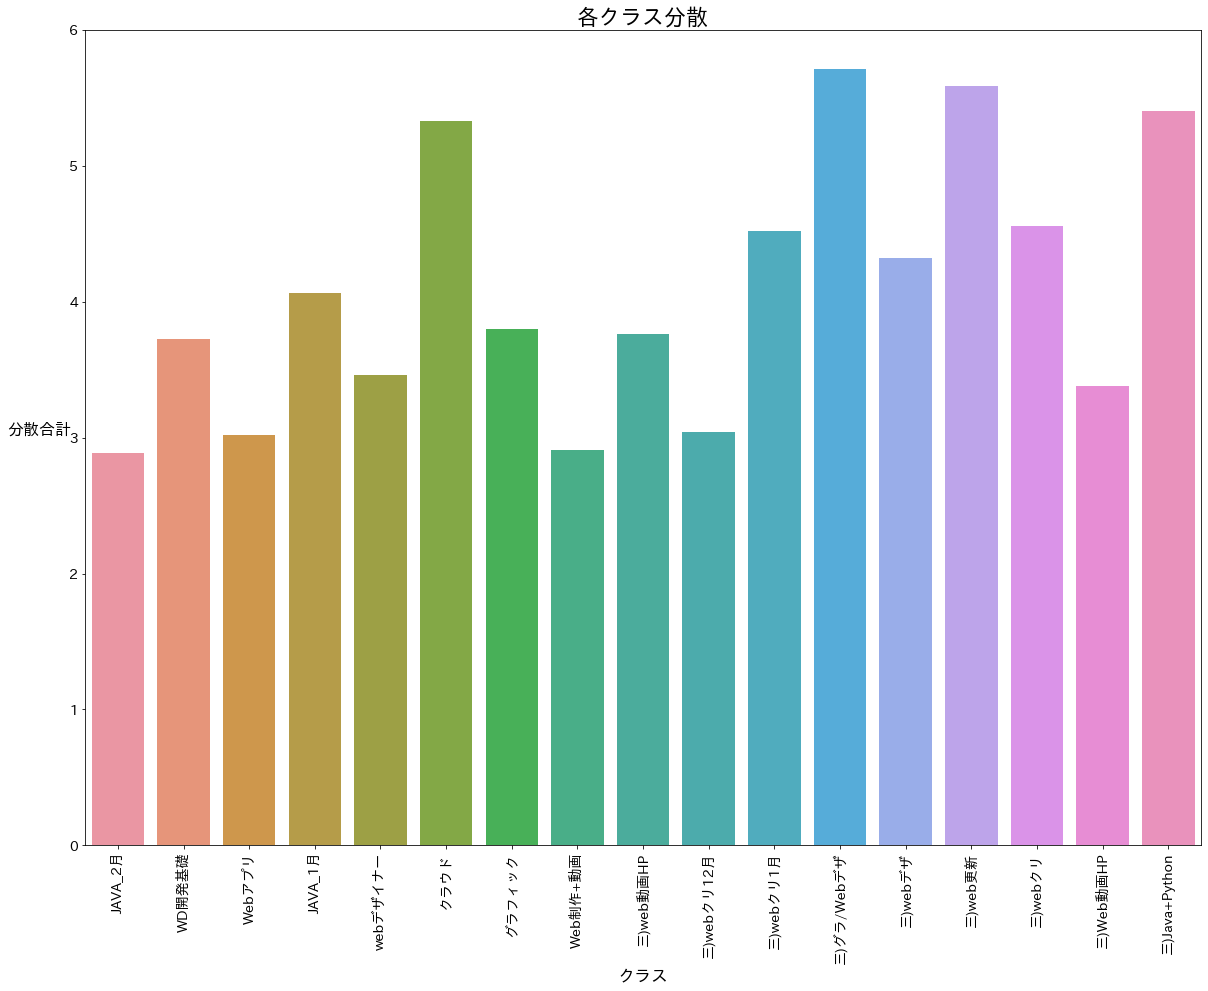

In [82]:
# ★
plt.figure(figsize=(20,15))
p=sns.barplot(data=bunsan)
p.set_title("各クラス分散",size=22)
p.set_xlabel("クラス",fontsize=17)
p.set_ylabel("分散合計",fontsize=16,rotation=0,labelpad=30)
p.tick_params(labelsize=14)
# plt.xticks(['JAVA_2月', 'WD開発基礎', 'Webアプリ', 'JAVA_1月', 'webデザイナー実践', 'クラウド','グラフィック', '未経験からめざせるWeb制作+動画', '三宮web動画HP','三)webクリ12月', '三宮webクリエーター1月','三宮グラフィック・Webデザイナー1月', '三宮webデザイン・プログラミング','三宮web更新', '三宮webクリエーター3月', '三宮Web動画HP','三宮実践Java+Pythonプログラマー養成4月'])
plt.xticks(rotation=90)
plt.rcParams["font.size"] = 7



In [ ]:
# plt.bar()

In [ ]:
df.head(3)

In [33]:
order =["していない", "自己分析","応募書類の作成","応募先の探索","エントリー","面接","内定"]
a=["class","Q8"]
df_g = df.loc[:,a]
df_g["Q8"].fillna("していない",inplace=True)
clas

['JAVA_2月',
 'WD開発基礎',
 'Webアプリ',
 'JAVA_1月',
 'webデザイナー実践',
 'クラウド',
 'グラフィック',
 '未経験からめざせるWeb制作+動画',
 '三宮web動画HP',
 '三宮webクリエーター12月',
 '三宮webクリエーター1月',
 '三宮グラフィック・Webデザイナー1月',
 '三宮webデザイン・プログラミング',
 '三宮web更新',
 '三宮webクリエーター3月',
 '三宮Web動画HP',
 '三宮実践Java+Pythonプログラマー養成4月']

In [34]:
df_g.isnull().sum()

class    0
Q8       0
dtype: int64

In [35]:
df_g["Q8"].unique

<bound method Series.unique of 0      応募書類の作成
1       応募先の探索
2       応募先の探索
3        エントリー
4       応募先の探索
        ...   
243      していない
244     応募先の探索
245     応募先の探索
246      していない
247     応募先の探索
Name: Q8, Length: 248, dtype: object>

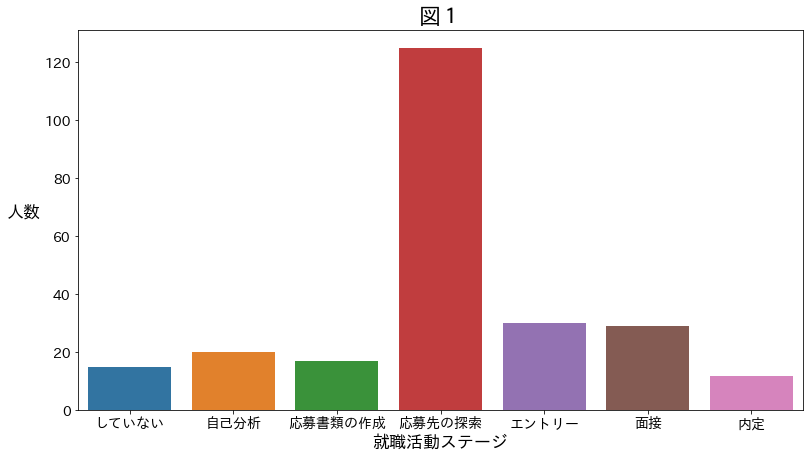

In [36]:
plt.figure(figsize=(13,7))
p=sns.countplot(data=df_g,x=df_g["Q8"],order=order)
p.set_title("図１",size=22)
p.set_xlabel("就職活動ステージ",fontsize=17)
p.set_ylabel("人数",fontsize=17,rotation=0,labelpad=20)
p.tick_params(labelsize=14)



In [75]:
clas = ['JAVA_2月', 'WD開発基礎', 'Webアプリ', 'JAVA_1月', 'webデザイナー実践', 'クラウド',
        'グラフィック', '未経験からめざせるWeb制作+動画', '三宮web動画HP',
        '三宮webクリエーター12月', '三宮webクリエーター1月',
        '三宮グラフィック・Webデザイナー1月', '三宮webデザイン・プログラミング',
        '三宮web更新', '三宮webクリエーター3月', '三宮Web動画HP',
        '三宮実践Java+Pythonプログラマー養成4月']
def figure(x):
  data = df_g.loc[df_g["class"]==clas[x],:]
  plt.figure(figsize=(13,7))
  p=sns.countplot(data=data,x=data["Q8"],order=order)
  p.set_title(clas[x],size=22)
  p.set_xlabel("就職活動ステージ",fontsize=17)
  p.set_ylabel("人数",fontsize=17,rotation=0,labelpad=20)
  p.tick_params(labelsize=14)

  

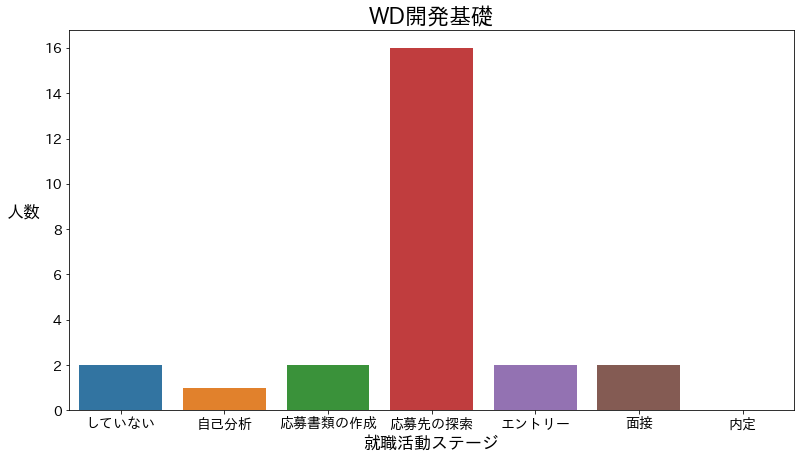

In [76]:
# ★
figure(1)


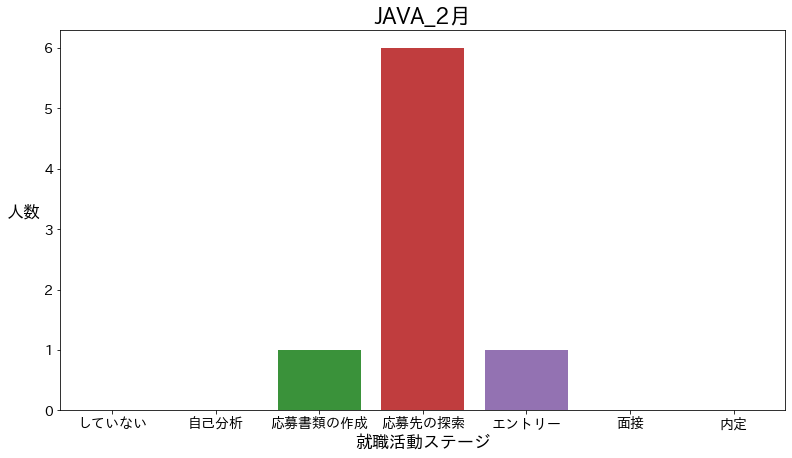

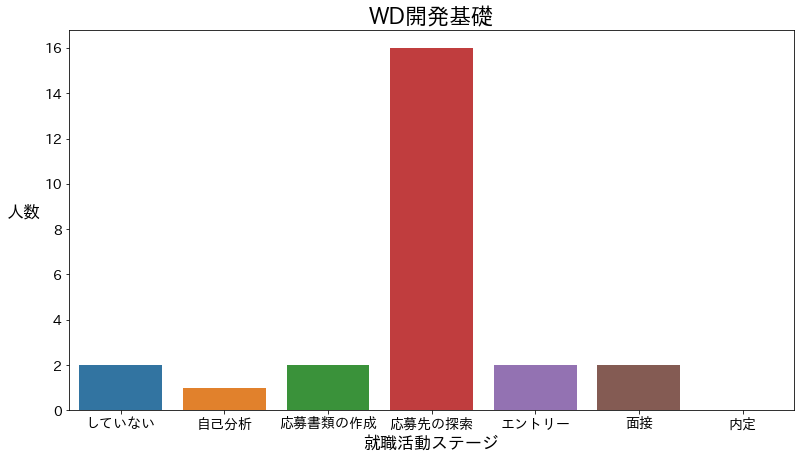

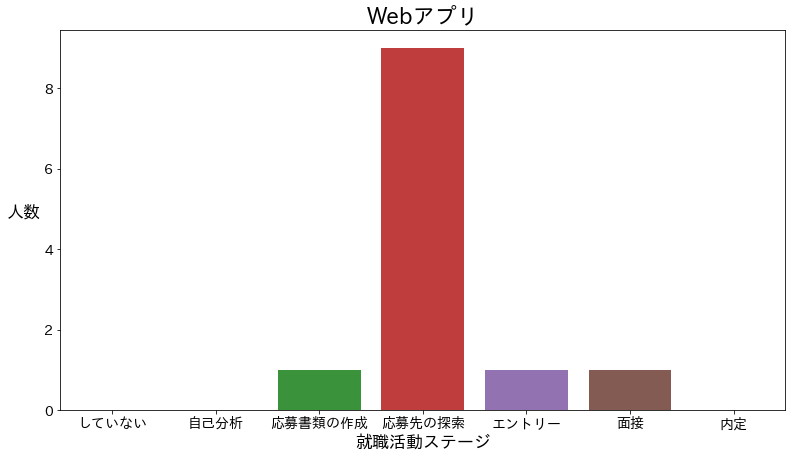

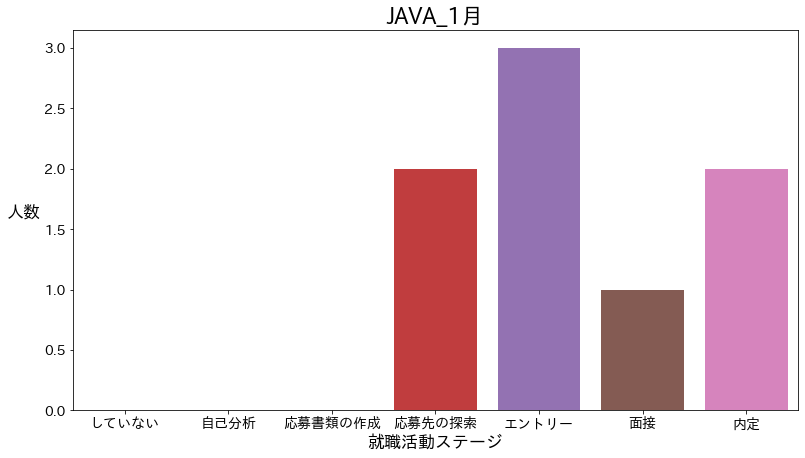

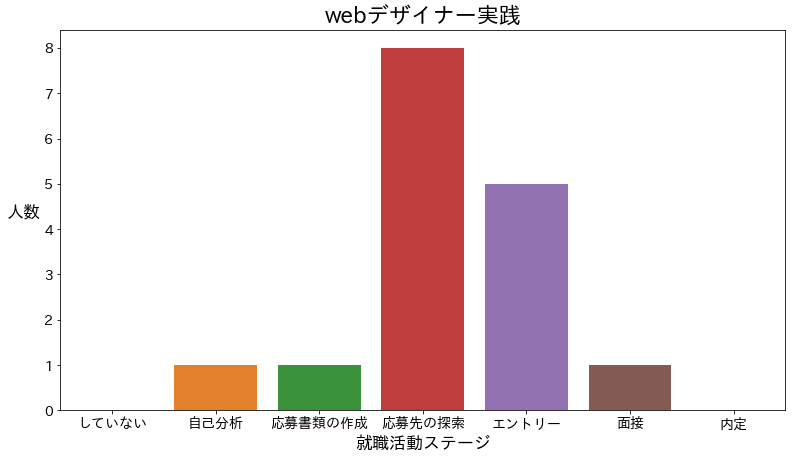

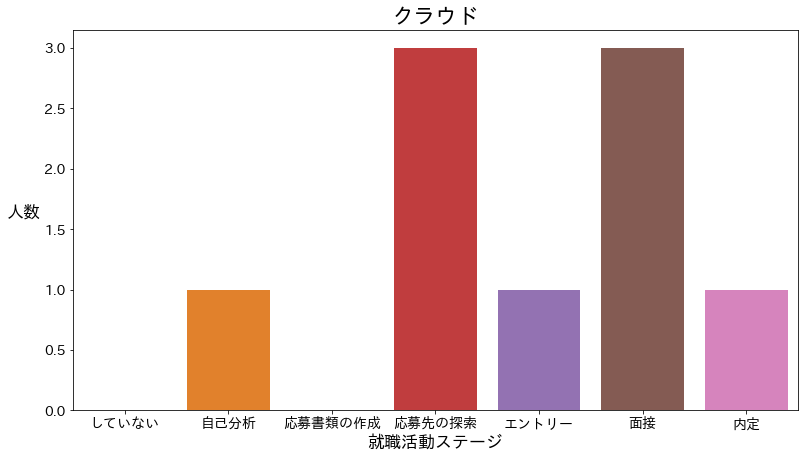

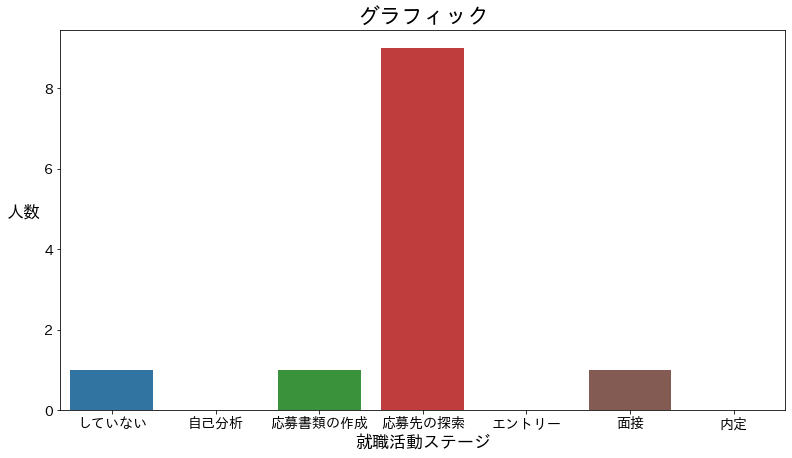

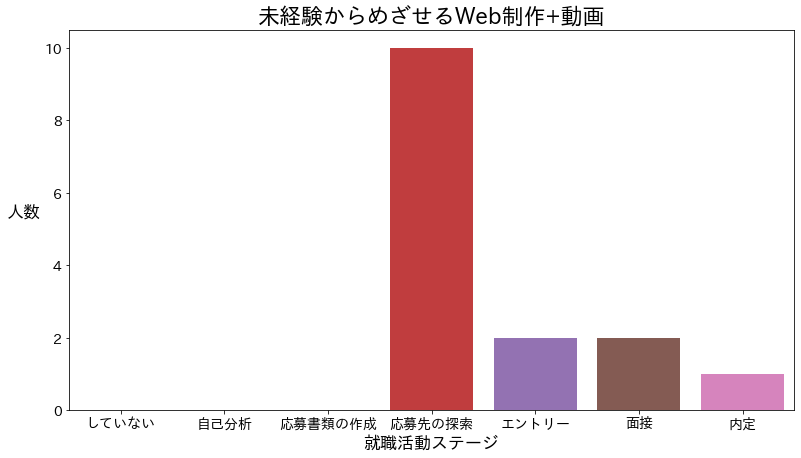

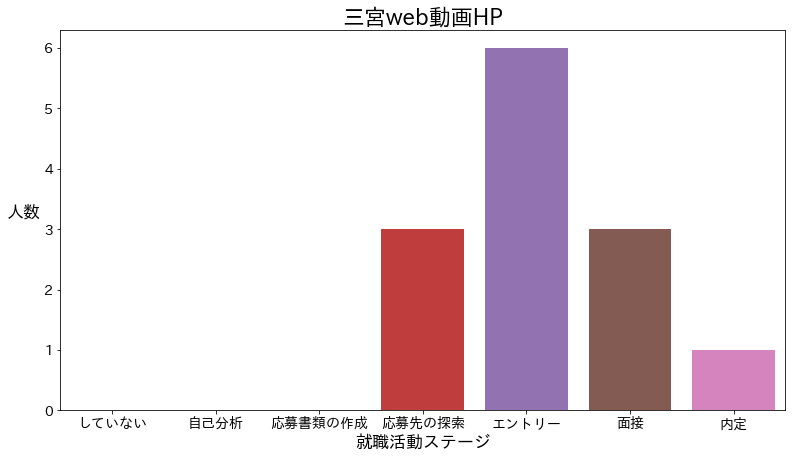

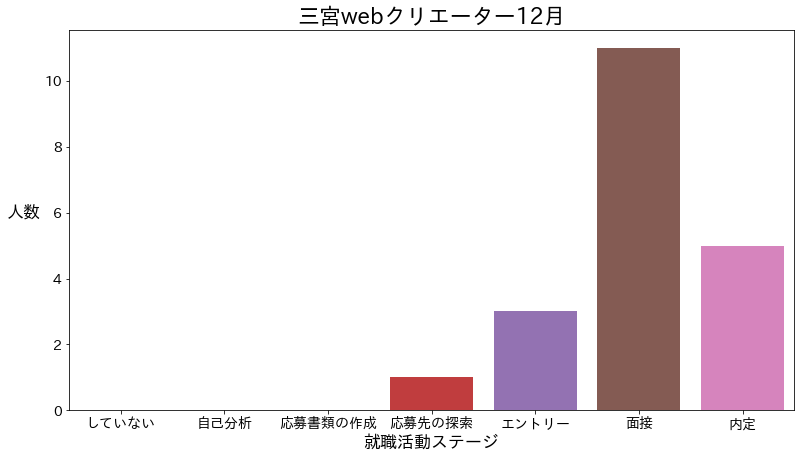

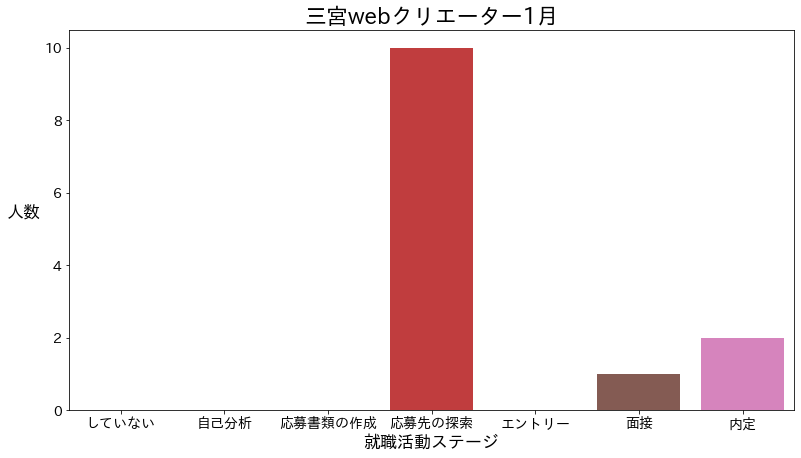

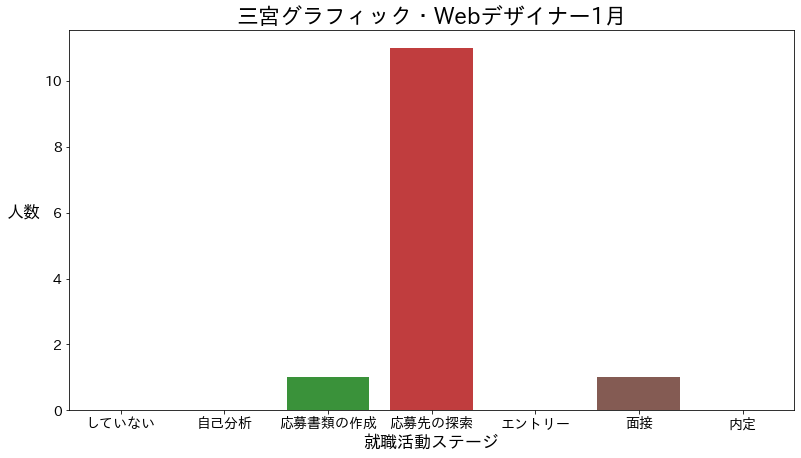

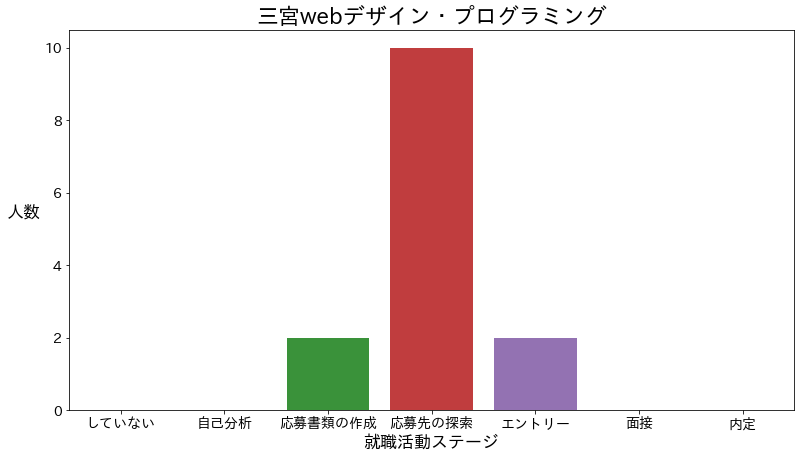

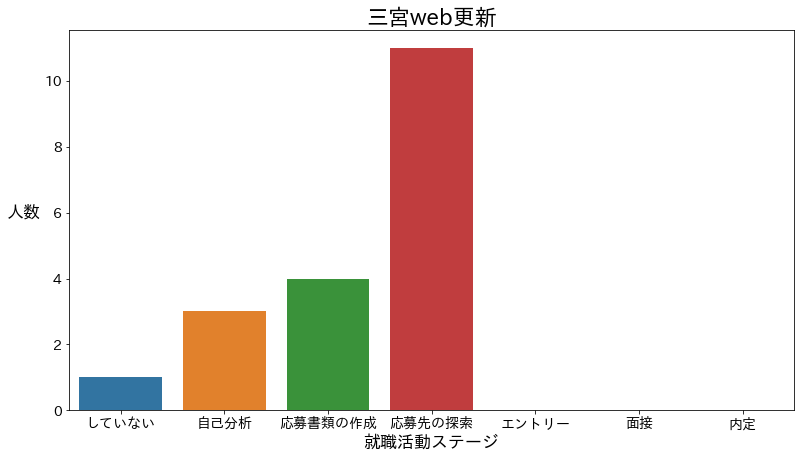

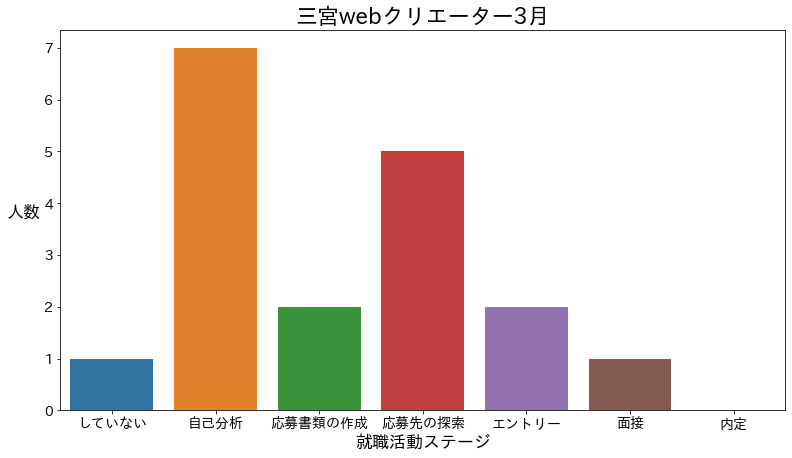

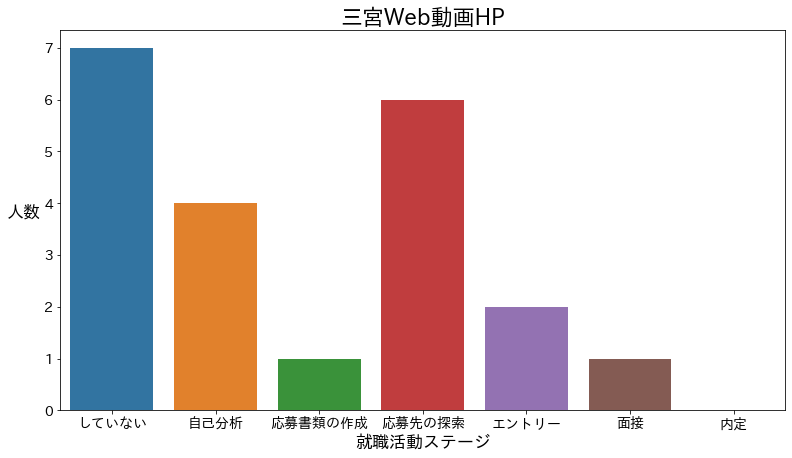

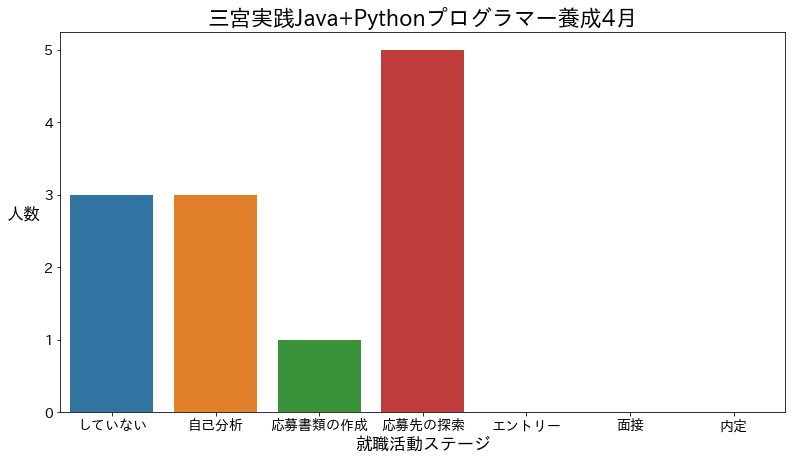

In [77]:
# ★
for i in range(0,17):
  figure(i)

In [ ]:
#  = df_g.loc[(df_g["class"]=='JAVA_2月')]
#  x=x["Q8"].unique（）
print("/jfkokjo/jojkl{}.png".format(1))

In [39]:
df_g.isnull().sum()

class    0
Q8       0
dtype: int64

In [40]:
df_g["Q8"].unique()

array(['応募書類の作成', '応募先の探索', 'エントリー', '面接', '自己分析', 'していない', '内定'],
      dtype=object)

In [43]:
df_g["stage"] = [0 if x=="していない" else 1 if x=="自己分析" else 2 if x=="応募書類の作成" else 3 if x =="応募先の探索" else 4 if x=="エントリー" else 5 if x=="面接" else 6 for x in df_g["Q8"]]

In [44]:
m = []
for i in range(0,17):
  data = df_g.loc[df_g["class"]==clas[i],:]
  x = round(data["stage"].mean(),3)
  m.append(x)

In [45]:
m

[3.0,
 2.84,
 3.167,
 4.375,
 3.25,
 3.889,
 2.833,
 3.6,
 4.154,
 5.0,
 3.615,
 3.077,
 3.0,
 2.316,
 2.167,
 1.762,
 1.667]

In [46]:
shukatu = pd.DataFrame(m)
shukatu.index = labels
#columns=clas
shukatu_t = shukatu.T

In [47]:
shukatu.rename(columns={0:"shukatu"},inplace=True)

In [48]:
shukatu["bunsan"] = b_sum

In [49]:
shukatu

,shukatu,bunsan
JAVA_2月,3.000,2.891
WD開発基礎,2.840,3.728
Webアプリ,3.167,3.021
JAVA_1月,4.375,4.063
webデザイナー,3.250,3.461
クラウド,3.889,5.333
グラフィック,2.833,3.802
Web制作+動画,3.600,2.907
三)web動画HP,4.154,3.763
三)webクリ12月,5.000,3.045


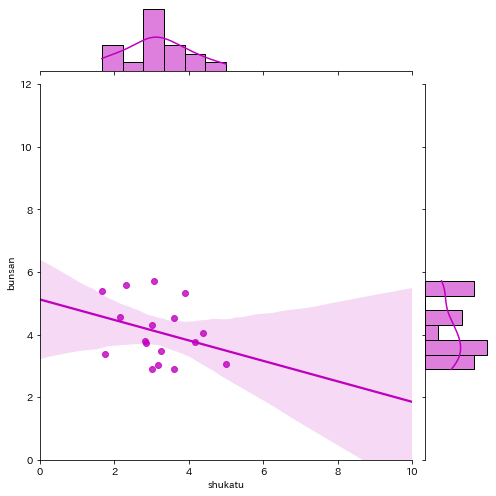

In [50]:
g = sns.jointplot(x="shukatu", y="bunsan", data=shukatu,
                  kind="reg", truncate=False,
                  xlim=(0, 10), ylim=(0, 12),
                  color="m", height=7)

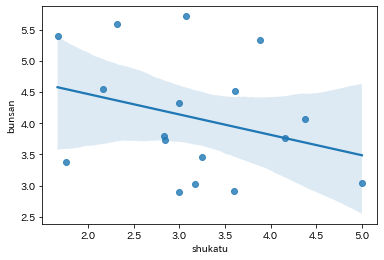

In [51]:

p = sns.regplot(x="shukatu", y="bunsan", data=shukatu, scatter=True, fit_reg=True)


<AxesSubplot:xlabel='shukatu', ylabel='bunsan'>

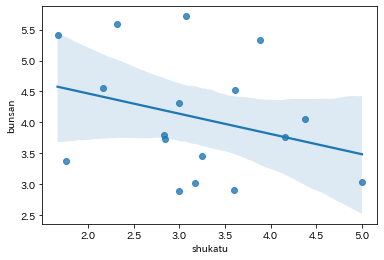

In [54]:
sns.regplot(x="shukatu", y="bunsan", data=shukatu, scatter=True )


In [53]:
df2

,Q1,Q2,Q3,Q4,Q5,Q6,class
0,3,3,3,3,1,3,JAVA_2月
1,3,3,3,3,1,3,JAVA_2月
2,4,3,3,5,1,3,JAVA_2月
3,3,3,3,3,1,3,JAVA_2月
4,3,3,3,5,3,4,JAVA_2月
...,...,...,...,...,...,...,...
242,4,3,2,5,1,4,三宮実践Java+Pythonプログラマー養成4月
243,4,3,1,6,3,4,三宮実践Java+Pythonプログラマー養成4月
244,3,3,2,1,2,4,三宮実践Java+Pythonプログラマー養成4月
245,2,2,1,3,3,4,三宮実践Java+Pythonプログラマー養成4月


In [55]:
classes  = df2['class'].value_counts()
print(classes)

WD開発基礎                       25
三宮Web動画HP                    21
三宮webクリエーター12月               20
三宮web更新                      19
三宮webクリエーター3月                18
webデザイナー実践                   16
未経験からめざせるWeb制作+動画            15
三宮webデザイン・プログラミング            14
三宮web動画HP                    13
三宮webクリエーター1月                13
三宮グラフィック・Webデザイナー1月          13
Webアプリ                       12
三宮実践Java+Pythonプログラマー養成4月    11
グラフィック                       11
クラウド                          9
JAVA_1月                       8
JAVA_2月                       8
Name: class, dtype: int64


In [56]:
shukatu.corr()

,shukatu,bunsan
shukatu,1.00000,-0.30499
bunsan,-0.30499,1.00000


In [57]:
n = []
for i in range(0,17):
  data = df2.loc[df2["class"]==clas[i],:]
  x = round(data["Q1"].mean(),3)
  n.append(x)

In [58]:
n

[3.25,
 3.4,
 3.583,
 3.375,
 3.25,
 3.222,
 2.364,
 3.667,
 4.0,
 3.95,
 4.0,
 4.0,
 3.5,
 3.474,
 3.889,
 3.619,
 3.091]

In [59]:
shukatu["akarusa"] = n
shukatu

,shukatu,bunsan,akarusa
JAVA_2月,3.000,2.891,3.250
WD開発基礎,2.840,3.728,3.400
Webアプリ,3.167,3.021,3.583
JAVA_1月,4.375,4.063,3.375
webデザイナー,3.250,3.461,3.250
クラウド,3.889,5.333,3.222
グラフィック,2.833,3.802,2.364
Web制作+動画,3.600,2.907,3.667
三)web動画HP,4.154,3.763,4.000
三)webクリ12月,5.000,3.045,3.950


In [60]:
shukatu1 = shukatu.iloc[:,1:3]
shukatu1

,bunsan,akarusa
JAVA_2月,2.891,3.250
WD開発基礎,3.728,3.400
Webアプリ,3.021,3.583
JAVA_1月,4.063,3.375
webデザイナー,3.461,3.250
クラウド,5.333,3.222
グラフィック,3.802,2.364
Web制作+動画,2.907,3.667
三)web動画HP,3.763,4.000
三)webクリ12月,3.045,3.950


In [61]:
shukatu1.corr()

,bunsan,akarusa
bunsan,1.000000,0.016469
akarusa,0.016469,1.000000


In [62]:
shukatu.corr()

,shukatu,bunsan,akarusa
shukatu,1.00000,-0.304990,0.285730
bunsan,-0.30499,1.000000,0.016469
akarusa,0.28573,0.016469,1.000000


In [63]:
#似たもの（分散が低い）が集まってもクラスの明るさが明るい傾向にはないかもしれんね

<AxesSubplot:xlabel='bunsan', ylabel='akarusa'>

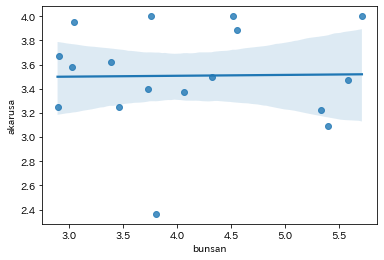

In [64]:
sns.regplot(x="bunsan", y="akarusa", data=shukatu, scatter=True )

#分散と明るさの相関図

In [65]:
n = []
for i in range(0,17):
  data = df2.loc[df2["class"]==clas[i],:]
  x = data["Q1"].sum()
  n.append(x)

In [66]:
shukatu["akarusa_sum"] = n

In [67]:
shukatu.corr()

,shukatu,bunsan,akarusa,akarusa_sum
shukatu,1.000000,-0.304990,0.285730,-0.109158
bunsan,-0.304990,1.000000,0.016469,-0.119654
akarusa,0.285730,0.016469,1.000000,0.552479
akarusa_sum,-0.109158,-0.119654,0.552479,1.000000


In [68]:
a = [
    [8,8],
     [28,25],
     [12,12],
     [9,8],
     [17,16],
     [9,9],
     [12,12],
     [17,15],
     [13,13],
     [18,18],
     [17,15],
     [13,13],
     [14,14],
     [19,19],
     [18,18],
     [24,21],
     [12,12],
     [275,248],
     ["",90.2]
     ]
utiwake = pd.DataFrame(a)

In [69]:
labels1 = ['JAVA_2月', 'WD開発基礎', 'Webアプリ', 'JAVA_1月', 'webデザイナー', 'クラウド',
        'グラフィック', 'Web制作+動画', '三)web動画HP',
        '三)webクリ12月', '三)webクリ1月',
        '三)グラ/Webデザ', '三)webデザ',
        '三)web更新', '三)webクリ', '三)Web動画HP','三)Java+Python',"合計","回答率"]

In [70]:
utiwake.columns = ["在籍人数", "回答数"]
utiwake.index = labels1
utiwake

,在籍人数,回答数
JAVA_2月,8,8.0
WD開発基礎,28,25.0
Webアプリ,12,12.0
JAVA_1月,9,8.0
webデザイナー,17,16.0
クラウド,9,9.0
グラフィック,12,12.0
Web制作+動画,17,15.0
三)web動画HP,13,13.0
三)webクリ12月,18,18.0


In [71]:
n = []

for i in range(0,17):
  data = df_g.loc[df_g["class"]==clas[i],:]
  x = round(np.var(data["stage"]),3)
  n.append(x)
n

[0.25,
 1.334,
 0.472,
 1.234,
 0.812,
 2.099,
 1.139,
 0.907,
 0.746,
 0.6,
 1.314,
 0.379,
 0.286,
 0.848,
 1.806,
 2.562,
 1.556]

In [72]:
shukatu["s_bunsan"] = n

In [73]:
shukatu.corr()

,shukatu,bunsan,akarusa,akarusa_sum,s_bunsan
shukatu,1.000000,-0.304990,0.285730,-0.109158,-0.359299
bunsan,-0.304990,1.000000,0.016469,-0.119654,0.211193
akarusa,0.285730,0.016469,1.000000,0.552479,-0.124186
akarusa_sum,-0.109158,-0.119654,0.552479,1.000000,0.162119
s_bunsan,-0.359299,0.211193,-0.124186,0.162119,1.000000
